<font color="#CA3532"><h1 align="left">Inteligencia Artificial Aplicada a la Bolsa (MIAX-8)</h1></font>
<font color="#5b5a59"><h2 align="left">Práctica sobre Redes Neuronales</h2></font>



### <font color="#CA3532">Carga de librerías</font>

La siguiente celda carga todas las librerías necesarias para la práctica. Si necesitas alguna librería adicional inclúyela al final.

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('MIAX8')
import dlfbt

# Incluye aquí otros imports que necesites
from tensorflow.keras import layers
from keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from time import time
import shutil

### <font color="#CA3532">Parte I: Modelos sencillos con Keras</font>

Los primeros modelos los haremos con datos generados de manera artificial. La siguiente celda crea un problema de regresión en una dimensión y representa gráficamente ``t`` frente a ``x``:

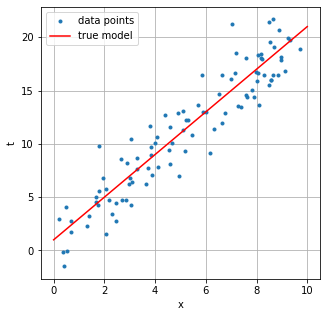

Forma de x: (100, 1)
Forma de t: (100, 1)


In [ ]:
dg = dlfbt.DataGeneratorLinear1D()
dg.create_dataset(seed=21)
dg.plot_dataset()

print("Forma de x:", dg.x.shape)
print("Forma de t:", dg.t.shape)

### <font color="#CA3532">Ejercicio 1</font> [1 punto]

Construye en Keras un modelo de regresión lineal para predecir la variable ``t`` a partir de la variable ``x``.

<font color="#CA3532">[1.1]</font> Define del modelo completando el código de la celda siguiente:

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


<font color="#CA3532">[1.2]</font> Compila el modelo, utilizando un optimizador SGD y la función de coste más apropiada para este problema. El learning rate lo deberás ajustar para que el entrenamiento converja:

In [ ]:

optimizer =tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, nesterov=False, name="SGD")

model.compile(loss='mse',
             optimizer=optimizer)
#mae=error absoluto medio
#mse cuadrado de la medio del error


La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

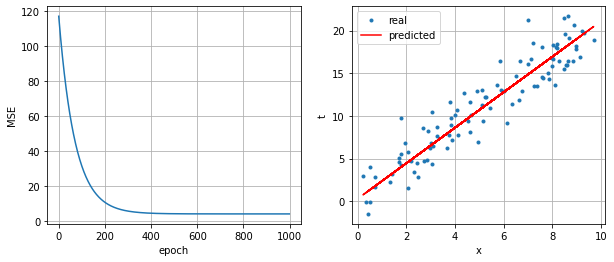

In [ ]:
history = model.fit(dg.x, dg.t, epochs=1000, batch_size=dg.x.shape[0], verbose=0)
y = model.predict(dg.x)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(dg.x, dg.t, '.')
plt.plot(dg.x, y, 'r-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('t')
plt.legend(('real', 'predicted'))
plt.show()

#### <font color="#CA3532">Ejercicio 2</font> [1 punto] 

A continuación vas a resolver un problema de regresión no lineal, también en una dimensión. La siguiente celda crea el problema y representa gráficamente ``t`` frente a ``x``:

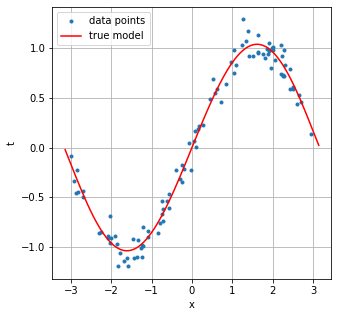

Forma de x: (100, 1)
Forma de t: (100, 1)


In [ ]:
dg = dlfbt.DataGeneratorNonLinear1D(coefs=[0, 1, 0, -0.15, 0, 0.005])
dg.create_dataset(xmin=-3.14, xmax=3.14, noise=0.1, seed=21)
dg.plot_dataset()

print("Forma de x:", dg.x.shape)
print("Forma de t:", dg.t.shape)

<font color="#CA3532">[2.1]</font> Define del modelo de regresión completando el código de la celda siguiente:

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Dense(30, input_shape=(1,), activation='tanh'))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                60        
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


<font color="#CA3532">[2.2]</font> Compila el modelo, utilizando un optimizador SGD y la función de coste más apropiada para este problema. El learning rate lo deberás ajustar para que el entrenamiento converja:

In [ ]:

optimizer =tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.0, nesterov=False, name="SGD")

model.compile(loss='mse',
             optimizer=optimizer)


La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

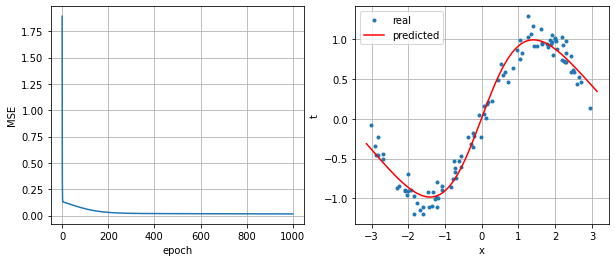

In [ ]:
history = model.fit(dg.x, dg.t, epochs=1000, batch_size=dg.x.shape[0], verbose=0)
y = model.predict(dg.modelx)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(dg.x, dg.t, '.')
plt.plot(dg.modelx, y, 'r-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('t')
plt.legend(('real', 'predicted'))
plt.show()

#### <font color="#CA3532">Ejercicio 3</font> [1 punto]

Finalmente vamos a plantear un problema de regresión logística. La siguiente celda crea los datos del problema (en dos dimensiones) y representa gráficamente la distribución de ``x`` para las dos clases ``t=0`` y ``t=1``:

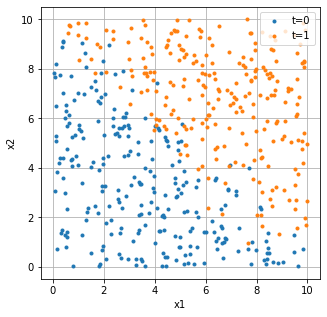

Forma de x: (500, 2)
Forma de t: (500, 1)


In [ ]:
dg = dlfbt.DataGeneratorLogistic(a=[2.0, 2.0], b=-20.0)
dg.create_dataset(n=500, seed=17)

plt.figure(figsize=(5, 5))
ix0 = (dg.t.ravel() == 0)
plt.plot(dg.x[ix0, 0], dg.x[ix0, 1], '.', label='t=0')
ix1 = (dg.t.ravel() == 1)
plt.plot(dg.x[ix1, 0], dg.x[ix1, 1], '.', label='t=1')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
plt.show()

print("Forma de x:", dg.x.shape)
print("Forma de t:", dg.t.shape)

<font color="#CA3532">[3.1]</font> Construye en Keras un modelo de regresión logística para predecir la variable ``t`` a partir de la variable ``x``. Define del modelo completando el código de la celda siguiente:

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape = (2,)))
model.add(keras.layers.Activation('sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


<font color="#CA3532">[3.2]</font> Compila el modelo, utilizando un optimizador SGD y la función de coste más apropiada para este problema. Añade las opciones necesarias para que se genere, además del ``loss``, la métrica ``accuracy``. El learning rate lo deberás ajustar para que el entrenamiento converja:

In [ ]:

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])


La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

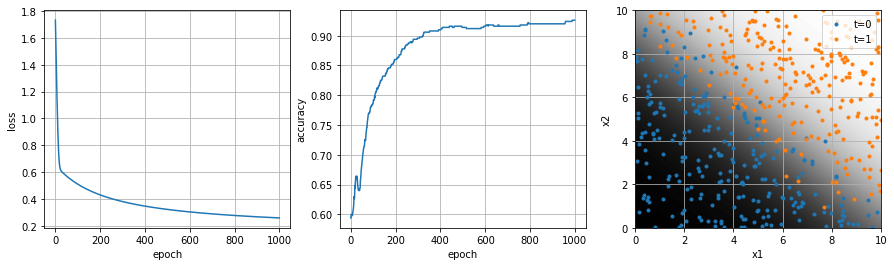

In [ ]:
history = model.fit(dg.x, dg.t, epochs=1000, batch_size=dg.x.shape[0], verbose=0)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')

xx, yy = np.meshgrid(np.arange(0, 10, 0.01), np.arange(0, 10,0.01))
xy = np.concatenate([xx.reshape([-1, 1]), yy.reshape([-1, 1])], axis=1)
z = model.predict(xy)

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, z.reshape(xx.shape), 100, cmap="gray")
plt.plot(dg.x[ix0, 0], dg.x[ix0, 1], '.', label='t=0')
plt.plot(dg.x[ix1, 0], dg.x[ix1, 1], '.', label='t=1')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([0, 10, 0, 10])
plt.legend(loc='upper right')

plt.show()

#### <font color="#CA3532">Ejercicio 4</font> [1 punto]

En este ejercicio vas a construir una red neuronal un poco más compleja y la vas a probar con distintos casos de prueba. La red debe tener las siguientes características:

- Una capa de entrada con 54 unidades.
- Dos capas ocultas, con 128 y 64 unidades respectivamente, función de activación ``sigmoid`` y ``batch normalization``.
- Una capa de salida lineal con 7 unidades. 
- Se debe aplicar ``dropout`` con parámetro 0.25 en las dos capas ocultas.
- Se debe incluir regularización L2, con parámetro 0.01, y L1, con parámetro 0.005, en los pesos de todas las capas (no debe afectar a los bias). 
- Todos los pesos de la red se deben inicializar con el método Xavier (ver transparencias [dffn.pdf](https://drive.google.com/file/d/1zzk1c40A_EP0TDf960i1E-_qf-7ECEUu/view?usp=sharing), p. 86).

<font color="#CA3532">[4.1]</font> Completa el código de la siguiente celda con tu solución:


In [ ]:
model = keras.Sequential()

model.add(keras.layers.Input(54))
model.add(keras.layers.Dense(128,
                            kernel_regularizer=keras.regularizers.L1L2(l1=0.005, l2=0.01),
                            kernel_initializer=keras.initializers.GlorotNormal()
                            ))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('sigmoid'))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Dense(64,
                             kernel_regularizer=keras.regularizers.L1L2(l1=0.005, l2=0.01),
                             kernel_initializer=keras.initializers.GlorotNormal()
                            ))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('sigmoid'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(7,
                           kernel_regularizer=keras.regularizers.L1L2(l1=0.005, l2=0.01),
                            kernel_initializer=keras.initializers.GlorotNormal()))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               7040      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                      

<font color="#CA3532">[4.2]</font> Si has hecho todo bien, tu modelo debería tener 16135 parámetros entrenables. Explica de dónde sale este número:



Capa_Oculta _1:
al ser una capa densa cada una de las entradas va a cada una de las neurosa entonces multiplicamos
W1 = d1 x d0 = 128 x 54 = 6912 , 

y le sumamos el bias
b1 = d1 x 1 = 128 ,  
Total_1c = W1 + b1 = 6912 + 128 = 7040

Capa _Batch_Normalization 1:

Gamma weights = 128,
Beta weights = 128,
M_mean1 = 128 # no entrenables,
Mo_variance1 = 128 # no entrenables,
Total_1N = 128 x 4 = 512 

Capa_Oculta _2:

W2 = d2 x d1 = 64 x 128 = 8192,
b2 = d2 x 1 = 64,
Total_2c = W2 + b2 = 8192 + 64 = 8256

Capa_Batch_Normalization 2:

Ga_weights = 64,
B_weights = 64,
M_mean2  = 64 # no entrenables,
Mo_variance2  = 64 # no entrenables,
Total_2N = 64 x 4 = 256

Capa_Salida:

W3 = d3 x d2 = 7 x 64 = 448,
b3 = d3 x 1 = 7,
Total = 448 + 7 = 455,
total_salida = 7040 + 512 + 8256 + 256 + 455 = 16519

No_entrenables = M_mean1 + Mo_variance1 + M_mean2 + Mo_variance2 128 + 128 + 64 + 64 = 384
Entrenables = 16519 - 384 = 16135

#### <font color="#CA3532">Ejercicio 5</font> [1 punto]

A continuación vamos a hacer una serie de pruebas para verificar que tu modelo está bien construido. Para ello vamos a usar los datos del problema de clasificación Forest Covertypes. El problema consiste en predecir el tipo de cubierta vegetal de un terreno a partir de características del mismo como su elevación, su pendiente, etcétera. Los detalles del problema los puedes consultar en estos enlaces:

https://scikit-learn.org/stable/datasets/real_world.html#forest-covertypes

https://archive.ics.uci.edu/ml/datasets/Covertype

La siguiente celda carga y prepara los datos:


In [ ]:
from sklearn.datasets import fetch_covtype
data = fetch_covtype()
x = data.data
t = data.target - 1

A continuación imprimimos la forma de las variables ``x`` e ``y``, así como los valores numéricos de cada una de las 7 clases del problema:

In [ ]:
print(x.shape)
print(t.shape)
print(np.unique(t))

(581012, 54)
(581012,)
[0 1 2 3 4 5 6]


<font color="#CA3532">[5.1]</font> Lo primero que debes hacer es dividir los datos en conjuntos de entrenamiento y test usando la función [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de ``scikit-learn``. El conjunto de test debe tener el 30% de los datos. La semilla (``random_state``) se debe fijar al valor 35 para que los resultados sean reproducibles. Utiliza los nombres de variable ``x_train``, ``x_test``, ``t_train`` y ``t_test``.

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,t_train,t_test = train_test_split(x, t, test_size=0.30, random_state=35)



<font color="#CA3532">[5.2]</font> A continuación estandariza los datos usando la clase [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [ ]:

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)


<font color="#CA3532">[5.3]</font> En la celda siguiente, compila el modelo usando como optimizador ``Adam`` con un learning rate de ``0.01`` y como función de coste ``hinge-loss``. Añade la precisión (``accuracy``) como métrica. Cambia el formato de las variables ``t_train``  y ``t_test`` si es necesario. A continuación carga los pesos del fichero ``random-weights``.

In [ ]:
fichero_pesos = "MIAX8/data/covertype/random-weights"

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')

model.compile(loss='categorical_hinge',
              optimizer= optimizer,
              metrics=['acc']
              )

t_train = keras.utils.to_categorical(t_train, num_classes=7)
t_test = keras.utils.to_categorical(t_test, num_classes=7)

model.load_weights(fichero_pesos)


En la celda siguiente se evalúa el modelo sobre el conjunto de datos. Como tu modelo parte de unos pesos determinados, los resultados deberían ser reproducibles. 

Si has hecho todo bien deberías obtener este resultado (no es demasiado bueno, pero ten en cuenta que el modelo aún no ha sido entrenado):

````
5447/5447 [==============================] - 9s 2ms/step - loss: 10.6614 - acc: 0.0296
[10.661399841308594, 0.02964361198246479]
````

In [ ]:
model.evaluate(x_test, t_test)

5447/5447 [==============================] - 15s 3ms/step - loss: 10.6614 - acc: 0.0296


[10.661399841308594, 0.02964361198246479]

Como última prueba vamos a entrenar el modelo durante 10 épocas. Antes de llamar a ``model.fit`` inicializamos las semillas del generador de números aleatorios para que, de nuevo, el resultado sea reproducible.

Si has hecho todo bien, al ejecutar la celda siguiente este debería ser el resultado al final de las 10 épocas:

````
loss: 0.8962 - acc: 0.6932
````

In [ ]:
np.random.seed(17)
tf.random.set_seed(195)
_ = model.fit(x_train, t_train, epochs=10, batch_size=512, shuffle=False)

Epoch 1/10
795/795 [==============================] - 10s 9ms/step - loss: 1.1482 - acc: 0.6741
Epoch 2/10
795/795 [==============================] - 7s 8ms/step - loss: 0.9310 - acc: 0.6933
Epoch 3/10
795/795 [==============================] - 6s 8ms/step - loss: 0.9136 - acc: 0.6947
Epoch 4/10
795/795 [==============================] - 6s 8ms/step - loss: 0.9132 - acc: 0.6940
Epoch 5/10
795/795 [==============================] - 6s 8ms/step - loss: 0.9085 - acc: 0.6944
Epoch 6/10
795/795 [==============================] - 6s 8ms/step - loss: 0.9037 - acc: 0.6950
Epoch 7/10
795/795 [==============================] - 6s 8ms/step - loss: 0.9008 - acc: 0.6948
Epoch 8/10
795/795 [==============================] - 6s 8ms/step - loss: 0.9013 - acc: 0.6937
Epoch 9/10
795/795 [==============================] - 6s 8ms/step - loss: 0.9032 - acc: 0.6937
Epoch 10/10
795/795 [==============================] - 6s 8ms/step - loss: 0.8962 - acc: 0.6932


Y al evaluar el modelo sobre el conjunto de test te debería salir esto:

````
5447/5447 [==============================] - 8s 2ms/step - loss: 0.8565 - acc: 0.7042
[0.8564687371253967, 0.704177737236023]
````

In [ ]:
model.evaluate(x_test, t_test)

5447/5447 [==============================] - 11s 2ms/step - loss: 0.8565 - acc: 0.7042


[0.8564687371253967, 0.704177737236023]

### <font color="#CA3532">Parte II: Optimización de hiperparámetros</font>


En esta parte de la práctica vamos a seguir trabajando con la base de datos de Forest Covertypes. Los datos deberían estar cargados en las variables ``x_train``, ``x_test``, ``t_train`` y ``t_test``:

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(406708, 54)
(174304, 54)
(406708, 7)
(174304, 7)


#### <font color="#CA3532">Ejercicio 6</font> [1 punto]

Construye una red neuronal para el problema Forest Covertypes, realizando una búsqueda lo más completa posible de los hiperparámetros con [Keras Tuner](https://keras-team.github.io/keras-tuner/documentation/tuners/). Debes considerar, al menos, los siguientes hiperparámetros:

- Learning rate.
- Número de capas ocultas.
- Número de unidades en las capas ocultas.
- Función de activación.
- Algún parámetro de regularización. 
- Optimizador.

Completa el código de las celdas siguientes en los lugares indicados, sin cambiar el nombre de la carpeta de logs.

**Nota:** Ten en cuenta que este ejercicio puede requerir mucho tiempo de ejecución. 

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 135 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 37.3 MB/s 


<font color="#CA3532">[6.1]</font> Define el hipermodelo:

In [ ]:
def model_builder(hp):
  #-------------------------------------------------------------
  hp_activation = hp.Choice('activation', values=['relu', 'selu', 'sigmoid', 'softmax'])
  hp_learning_rate = hp.Choice('learning_rate', values = [1.0, 0.1, 0.01, 0.001])
  hp_optimizer= hp.Choice('optimazer', values = ['SGD', ' Adam'])
  hp_regulaizers = hp.Choice('regulaizers', values= [0.01, 0.05, 0.1 ])   
  hp_units = hp.Int('units', min_value = 32, max_value = 128, step = 32)
  hp_layers = hp.Int('layers', min_value = 1, max_value = 5, step = 1)

  #-------------------------------------------------------------

  model = keras.Sequential()
  model.add(keras.layers.Input(54))

  hp_units = hp.Int('units', min_value = 32, max_value = 128, step = 32)
  hp_layers = hp.Int('layers', min_value = 1, max_value = 5, step = 1)


  for i in range(hp_layers):
    model.add(keras.layers.Dense(hp_units,
                            kernel_regularizer=keras.regularizers.L1L2( l2=hp_regulaizers),
                            kernel_initializer=keras.initializers.GlorotNormal()
                            ))       
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(hp_activation))
    model.add(keras.layers.Dropout(0.25))


  model.add(keras.layers.Dense(7,
                          kernel_regularizer=keras.regularizers.L1L2(l1=0.005, l2=0.01),
                          kernel_initializer=keras.initializers.GlorotNormal()))

  model.compile(loss= 'categorical_hinge',
    optimizer= hp_optimizer,
    metrics= ['acc']
                  )
  return model

Borrado de la carpeta de logs:

In [ ]:
!rm -rf logs-proyecto/keras_tuner

Creación de un ``tuner`` de tipo ``Hyperband`` que usa el hipermodelo anterior. El objetivo a optimizar es la precisión (accuracy) sobre el conjunto de validación. El máximo número de épocas es 10.

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_acc', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'logs-proyecto/keras_tuner',
                     project_name = 'kt')  

Resumen del espacio de búsqueda. Comprueba que contiene todos los valores a considerar para cada uno de los hiperparámetros.

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'selu', 'sigmoid', 'softmax'], 'ordered': False}
learning_rate (Choice)
{'default': 1.0, 'conditions': [], 'values': [1.0, 0.1, 0.01, 0.001], 'ordered': True}
optimazer (Choice)
{'default': 'SGD', 'conditions': [], 'values': ['SGD', ' Adam'], 'ordered': False}
regulaizers (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.05, 0.1], 'ordered': True}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}


<font color="#CA3532">[6.2]</font> Divide el conjunto de entrenamiento, de manera aleatoria, en dos subconjuntos. El primero, ``(tr_data, tr_labels)`` contendrá el 70% de los datos y lo usaremos para entrenar los hipermodelos. El segundo, ``(val_data, val_labels)`` contendrá el 30% de los datos y lo usaremos para validar los hipermodelos. Puedes usar [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de ``sklearn.model_selection``.

In [ ]:

tr_data, val_data, tr_labels, val_labels = train_test_split(x_train, t_train, test_size = 0.30 , random_state = 50)

<font color="#CA3532">[6.3]</font> Realiza la búsqueda de los hiperparámetros llamando a ``tuner.search`` usando los datos ``tr_data``, ``tr_labels`` como conjunto de entrenamiento y los datos ``val_data``, ``val_labels`` como conjunto de validación: 

In [ ]:

tuner.search(tr_data ,tr_labels,
            epochs=5,
            validation_data=(val_data, val_labels))



Trial 1 Complete [00h 02m 25s]
val_acc: 0.6517256498336792

Best val_acc So Far: 0.6517256498336792
Total elapsed time: 00h 02m 25s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
relu              |sigmoid           |activation
0.001             |1                 |learning_rate
SGD               |SGD               |optimazer
0.1               |0.01              |regulaizers
64                |96                |units
4                 |5                 |layers
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
8897/8897 [==============================] - 49s 5ms/step - loss: 1.5695 - acc: 0.6630 - val_loss: 0.7841 - val_acc: 0.6900
Epoch 2/2
8897/8897 [==============================] - 37s 4ms/step - loss: 0.7986 - acc: 0.6720 - val_loss: 0.7669 - val_acc: 0.6740


<font color="#CA3532">[6.4]</font> Selecciona los mejores hiperparámetros, vuelve a entrenar el modelo con todos los datos de entrenamiento y aplícalo al conjunto de test.

In [ ]:
best_hps=tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)
model.fit(x_train, t_train, epochs=10,validation_data=(x_test, t_test))